# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Baltazar Servín Riveroll

- ID: A01643496

- My carreer: ITC


# Importing libraries

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [3]:
Ruta = ""
url = Ruta + "A01643496_X.csv"
df = pd.read_csv(url)

## b) Data managment


Print the first 7 rows

In [6]:
df.loc[:6,:]

Unnamed: 0         x1        x2        x3         x4        x5        x6  \
0           0  -7.219738 -0.089923 -2.628920  -9.046805  0.090868 -6.052993   
1           1  -1.210557  2.130715  0.988166  -6.463544 -8.438858  2.905959   
2           2  -5.138359 -4.630616  0.772070 -11.225579  4.352903  3.591397   
3           3  -3.687856  0.517451  2.268282 -12.208089 -1.065503 -6.169523   
4           4  11.613590  8.997685  5.645866  -7.375333  5.464648 -7.579613   
5           5  -6.916503 -3.790228  2.058258  -6.300820  5.164402  2.696896   
6           6  -4.471853  1.555904 -3.432438  -3.955518 -8.099527  2.584672   

         x7        x8         x9       x10       x11       x12  
0 -7.437430  0.358208  -3.249854 -7.313930 -2.855678 -5.101044  
1  3.855969  0.595263  -9.585051  3.314742 -1.512923  1.318553  
2  3.050483  8.790174   4.585363  1.512938  7.823646 -3.507382  
3 -1.173874  0.690940  -4.776490 -2.649515 -2.272127 -6.870574  
4 -1.069559 -2.900713  -3.142613  6.490809 -8.980515  5.427583  
5  3.926382  5.719505   2.812210  0.334022  5.756872 -4.792495  
6  1.386762  1.685783 -11.361339  3.865611 -3.674237  1.051769

Print the last 4 rows

In [9]:
df.loc[457:461,:]

Unnamed: 0        x1        x2        x3        x4        x5        x6  \
457         457  1.018519 -0.810908 -0.002954 -5.079191 -3.853973 -7.970670   
458         458 -5.883418 -4.714452  1.379034 -8.541002  4.350914  0.867646   
459         459 -9.523695 -4.366287  3.228342  9.612453  2.222379  0.995545   
460         460  5.805432  9.383155  4.494393 -2.843457  4.204525 -9.565568   

           x7        x8        x9       x10        x11       x12  
457 -5.224320 -0.813686 -1.729765 -8.598656  -0.790281 -4.754228  
458  1.705264  4.714783  4.961606  3.815710   6.860019 -3.093239  
459 -9.991264  2.027287  1.470727  0.690137 -11.284744  8.665523  
460  4.295214 -3.331857 -5.348367 -0.568056  -7.598739  6.387896

How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(461, 13)

Print the name of all columns

Use the `columns` method

In [10]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [12]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Las filas representan una medición o instancia en la base de datos, no se tiene muy claro que es lo que estamos midiendo aquí, pero se tienen 461 mediciones.

2. Las columnas son los atributos que pertenece a todas las instancias de las mediciones

3.

...

Print a statistical summary of your columns


In [14]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  461.000000  461.000000  461.000000  461.000000  461.000000  461.000000   
mean   230.000000   -2.419554    0.458193    1.692145   -3.441041   -0.110056   
std    133.223496    5.946666    6.113828    3.040622    7.387853    4.827782   
min      0.000000  -14.217810  -11.522459   -6.111308  -14.466633  -11.058839   
25%    115.000000   -6.221907   -3.965682   -0.585306   -8.438495   -4.563830   
50%    230.000000   -2.973817    0.073369    1.452420   -5.587738    1.063693   
75%    345.000000    0.519122    4.262085    4.055060   -2.818985    3.892938   
max    460.000000   14.109550   14.599934   10.128688   14.506103    9.395010   

               x6          x7          x8          x9         x10         x11  \
count  461.000000  461.000000  461.000000  461.000000  461.000000  461.000000   
mean    -2.962459   -1.470934    0.573459   -1.885944   -0.121891   -3.078111   
std      5.069920    5.021888    3.610574    5.836955    3.992705    5.975468   
min    -14.444539  -13.108630   -7.497608  -15.476786   -8.788906  -15.269670   
25%     -7.603019   -6.491304   -2.157792   -6.827389   -3.225374   -8.583497   
50%     -2.240401    0.117272    0.255716   -1.843940   -0.031540   -2.532923   
75%      1.413427    2.714221    2.835872    3.415497    2.763800    0.631651   
max      7.030192    7.936842    9.900896   11.012940    9.538005    9.064885   

              x12  
count  461.000000  
mean     0.889821  
std      5.965262  
min    -12.259068  
25%     -4.638725  
50%      1.304398  
75%      6.095494  
max     11.684688

1. What is the minumum and maximum values of each variable: significan el valor máximo y mínimo que alcanzan esas columnas en la base de datos.

2. What is the mean and standar deviation of each variable: mean es el promedio de todos los datos de esa variable, y la desviación estandar representa como se esparcen los valores desde el valor promedio.

3. What the 25%, 50% and 75% represent?: dividen la información en percentiles, el valor que tenga 25% significa que el 25% de la información estará debajo de ese valor, igual para le 50% el cuál es igual al promedio, y lo mismo para el 75%

Rename the columns using the same name with capital letters

In [20]:
df = df.rename(columns={"x1": "X1"})
df = df.rename(columns={"x2": "X2"})
df = df.rename(columns={"x3": "X3"})
df = df.rename(columns={"x4": "X4"})
df = df.rename(columns={"x5": "X5"})
df = df.rename(columns={"x6": "X6"})
df = df.rename(columns={"x7": "X7"})
df = df.rename(columns={"x8": "X8"})
df = df.rename(columns={"x9": "X9"})
df = df.rename(columns={"x10": "X10"})
df = df.rename(columns={"x11": "X11"})
df = df.rename(columns={"x12": "X12"})
df.head()

Unnamed: 0         X1        X2        X3         X4        X5        X6  \
0           0  -7.219738 -0.089923 -2.628920  -9.046805  0.090868 -6.052993   
1           1  -1.210557  2.130715  0.988166  -6.463544 -8.438858  2.905959   
2           2  -5.138359 -4.630616  0.772070 -11.225579  4.352903  3.591397   
3           3  -3.687856  0.517451  2.268282 -12.208089 -1.065503 -6.169523   
4           4  11.613590  8.997685  5.645866  -7.375333  5.464648 -7.579613   

         X7        X8        X9       X10       X11       X12  
0 -7.437430  0.358208 -3.249854 -7.313930 -2.855678 -5.101044  
1  3.855969  0.595263 -9.585051  3.314742 -1.512923  1.318553  
2  3.050483  8.790174  4.585363  1.512938  7.823646 -3.507382  
3 -1.173874  0.690940 -4.776490 -2.649515 -2.272127 -6.870574  
4 -1.069559 -2.900713 -3.142613  6.490809 -8.980515  5.427583

Rename the columns to their original names

In [22]:
df = df.rename(columns={"X1": "x1"})
df = df.rename(columns={"X2": "x2"})
df = df.rename(columns={"X3": "x3"})
df = df.rename(columns={"X4": "x4"})
df = df.rename(columns={"X5": "x5"})
df = df.rename(columns={"X6": "x6"})
df = df.rename(columns={"X7": "x7"})
df = df.rename(columns={"X8": "x8"})
df = df.rename(columns={"X9": "x9"})
df = df.rename(columns={"X10": "x10"})
df = df.rename(columns={"X11": "x11"})
df = df.rename(columns={"X12": "x12"})
df.head()

Unnamed: 0         x1        x2        x3         x4        x5        x6  \
0           0  -7.219738 -0.089923 -2.628920  -9.046805  0.090868 -6.052993   
1           1  -1.210557  2.130715  0.988166  -6.463544 -8.438858  2.905959   
2           2  -5.138359 -4.630616  0.772070 -11.225579  4.352903  3.591397   
3           3  -3.687856  0.517451  2.268282 -12.208089 -1.065503 -6.169523   
4           4  11.613590  8.997685  5.645866  -7.375333  5.464648 -7.579613   

         x7        x8        x9       x10       x11       x12  
0 -7.437430  0.358208 -3.249854 -7.313930 -2.855678 -5.101044  
1  3.855969  0.595263 -9.585051  3.314742 -1.512923  1.318553  
2  3.050483  8.790174  4.585363  1.512938  7.823646 -3.507382  
3 -1.173874  0.690940 -4.776490 -2.649515 -2.272127 -6.870574  
4 -1.069559 -2.900713 -3.142613  6.490809 -8.980515  5.427583

Use two different alternatives to get one of the columns

In [29]:
df.loc[:,"x6"]

0     -6.052993
1      2.905959
2      3.591397
3     -6.169523
4     -7.579613
         ...   
456   -5.095228
457   -7.970670
458    0.867646
459    0.995545
460   -9.565568
Name: x6, Length: 461, dtype: float64

In [27]:
df.iloc[:,6:7]

x6
0   -6.052993
1    2.905959
2    3.591397
3   -6.169523
4   -7.579613
..        ...
456 -5.095228
457 -7.970670
458  0.867646
459  0.995545
460 -9.565568

[461 rows x 1 columns]

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [35]:
df.iloc[62:73,1:3]

x1         x2
62  -9.844013  -8.372561
63  -2.993917  -4.909485
64  -3.617330   3.392336
65  -4.044652  -3.309548
66   5.667173  10.276058
67  -5.184262  -1.573793
68  -3.251098   0.224402
69   1.494823  -1.210675
70  10.175205  11.928060
71  -3.360636  -2.414577
72   4.761501   9.379976

For the second and third columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [53]:
print("Null values in x1: ")
print(pd.isnull(df.x1).sum())
print("Not null values in x1: ")
print(pd.notnull(df.x1).sum())
print("Total values in x1: ")
print(df.shape[0])

print("Null values in x2: ")
print(pd.isnull(df.x2).sum())
print("Not null values in x2: ")
print(pd.notnull(df.x2).sum())
print("Total values in x2: ")
print(df.shape[0])

Null values in x1: 
0
Not null values in x1: 
461
Total values in x1: 
461
Null values in x2: 
0
Not null values in x2: 
461
Total values in x2: 
461


Discard the last column


In [54]:
df.drop("x12", axis=1, inplace = True)
df.head()

Unnamed: 0         x1        x2        x3         x4        x5        x6  \
0           0  -7.219738 -0.089923 -2.628920  -9.046805  0.090868 -6.052993   
1           1  -1.210557  2.130715  0.988166  -6.463544 -8.438858  2.905959   
2           2  -5.138359 -4.630616  0.772070 -11.225579  4.352903  3.591397   
3           3  -3.687856  0.517451  2.268282 -12.208089 -1.065503 -6.169523   
4           4  11.613590  8.997685  5.645866  -7.375333  5.464648 -7.579613   

         x7        x8        x9       x10       x11  
0 -7.437430  0.358208 -3.249854 -7.313930 -2.855678  
1  3.855969  0.595263 -9.585051  3.314742 -1.512923  
2  3.050483  8.790174  4.585363  1.512938  7.823646  
3 -1.173874  0.690940 -4.776490 -2.649515 -2.272127  
4 -1.069559 -2.900713 -3.142613  6.490809 -8.980515

### Questions

Based on the previos results, provide a full description of yout dataset

Your response: La base de datos contiene 461 mediciones con 12 (13 antes de eliminar) atributos que existen en un rango de aproximadamente -15 a 15, todos estos atributos son float.




## c) Data visualization

Plot in the histogram of one of the variables

Text(0.5, 1.0, 'Histogram x1')

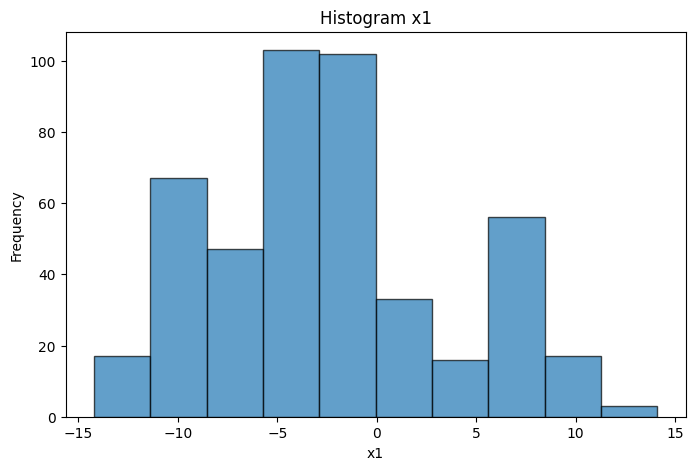

In [56]:
histogram = df["x1"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("x1")
histogram.set_ylabel("Frequency")
histogram.set_title("Histogram x1")

Plot in the same figure the histogram of two variables



Text(0.5, 1.0, 'Histogram of x1 and x2')

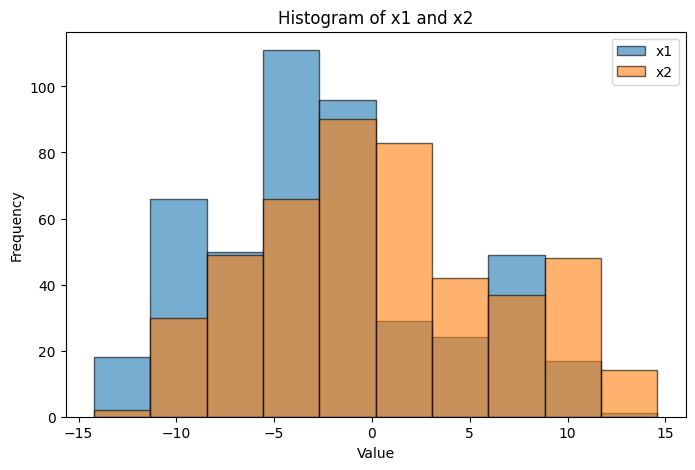

In [57]:
histogram = df[["x1", "x2"]].plot(kind="hist", bins=10, alpha=0.6, edgecolor="black", figsize=(8,5), legend=True)
histogram.set_xlabel("Value")
histogram.set_ylabel("Frequency")
histogram.set_title("Histogram of x1 and x2")

Based on these plots, provide a description of your data:

Your response here: ambas variables se encuentran dentro de un rango (-15, 15) y se puede observar cómo la mayoria de mediciones está entre el -5 y el 0

Plot the boxplot of one of the variables

Text(0.5, 1.0, 'Boxplot of x1')

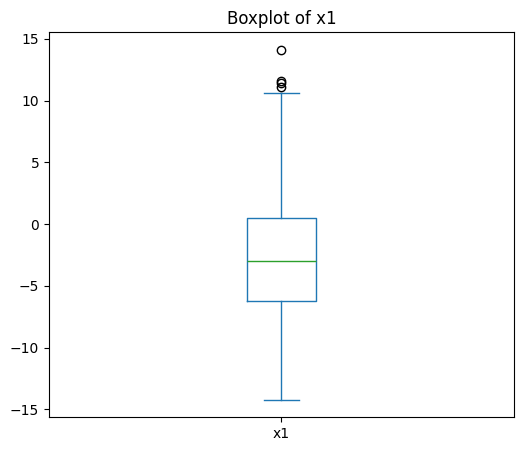

In [59]:
boxplot = df["x1"].plot(kind="box", figsize=(6,5))
boxplot.set_title("Boxplot of x1")

Plot in the same figure the boxplot of two variables

Text(0.5, 1.0, 'Boxplots of x1, x2')

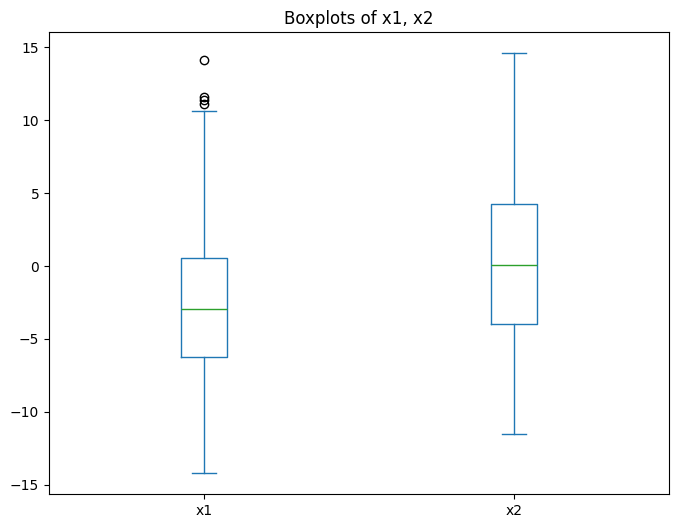

In [60]:
boxplot = df[["x1", "x2"]].plot(kind="box", figsize=(8,6))
boxplot.set_title("Boxplots of x1, x2")

Based on these plots, provide a description of your data:

Your response here: Ambas variables se encuentran dentro de un rango (-15, 15) y se puede observar cómo la mayoria de mediciones está entre el -5 y el 0

Plot the scatter plot between all pair of variables

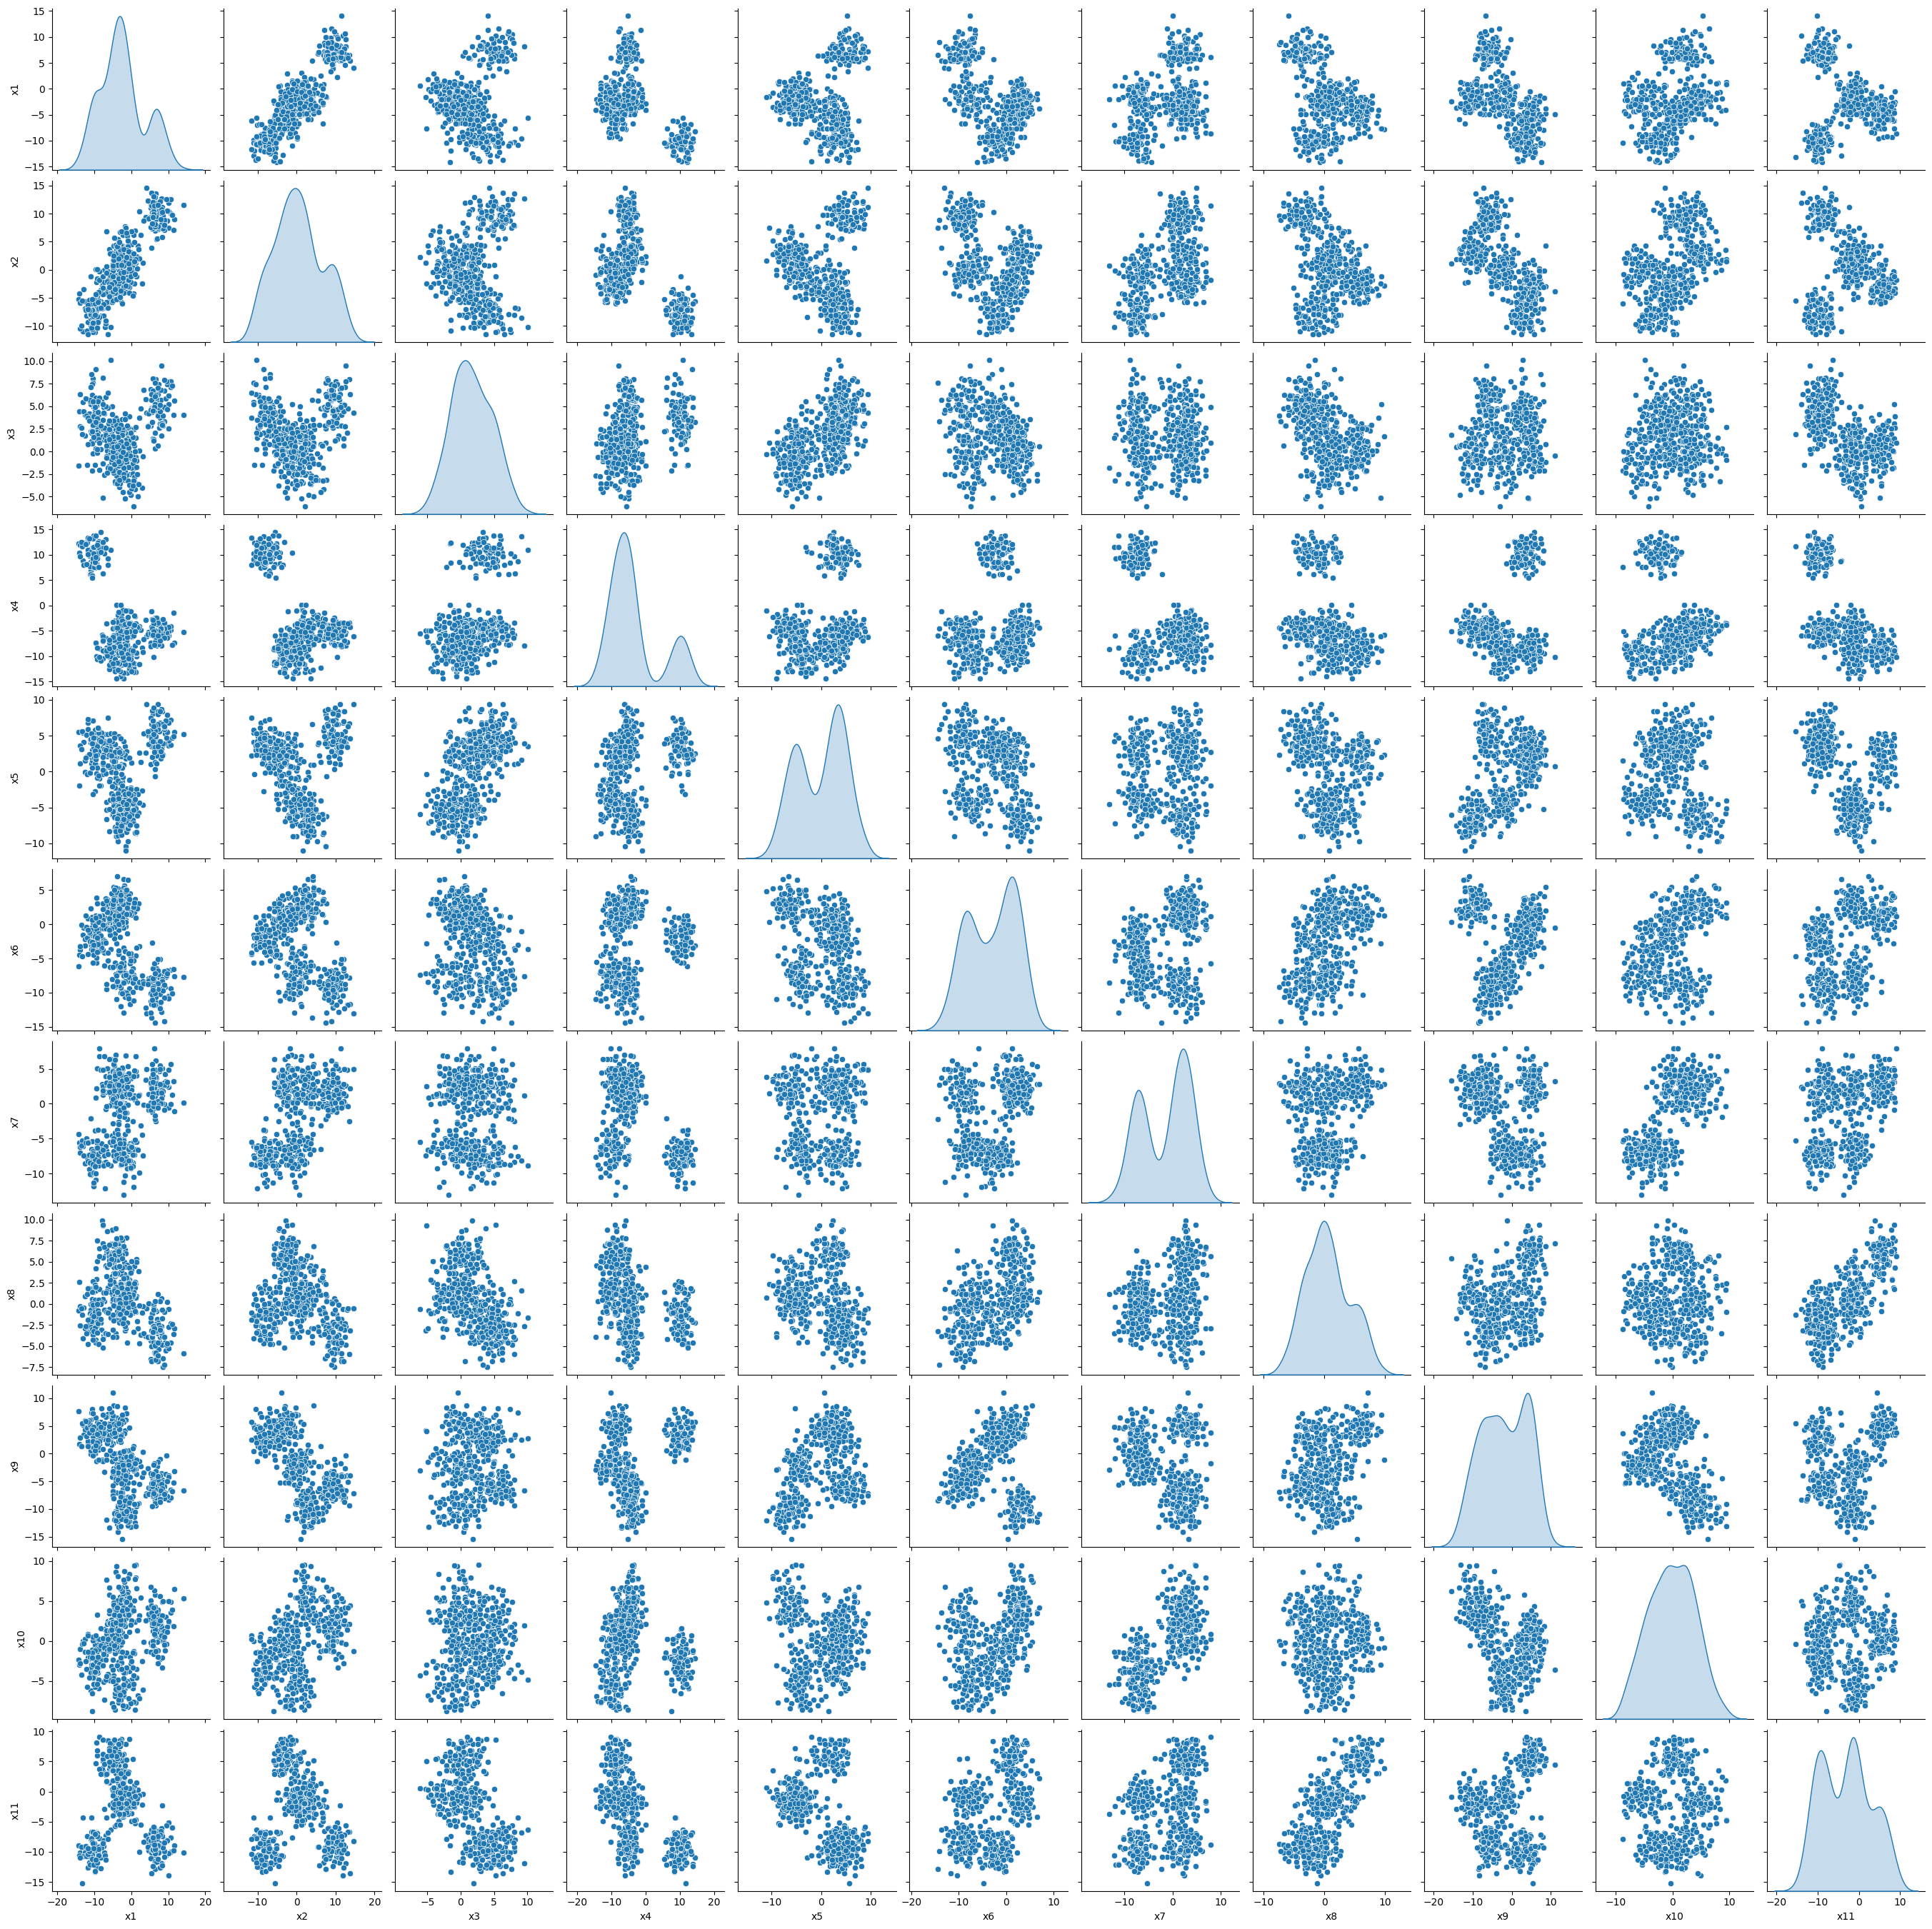

In [63]:
pairplot = df[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11"]].apply(pd.to_numeric, errors="coerce").dropna()

sns.pairplot(pairplot, diag_kind="kde")

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

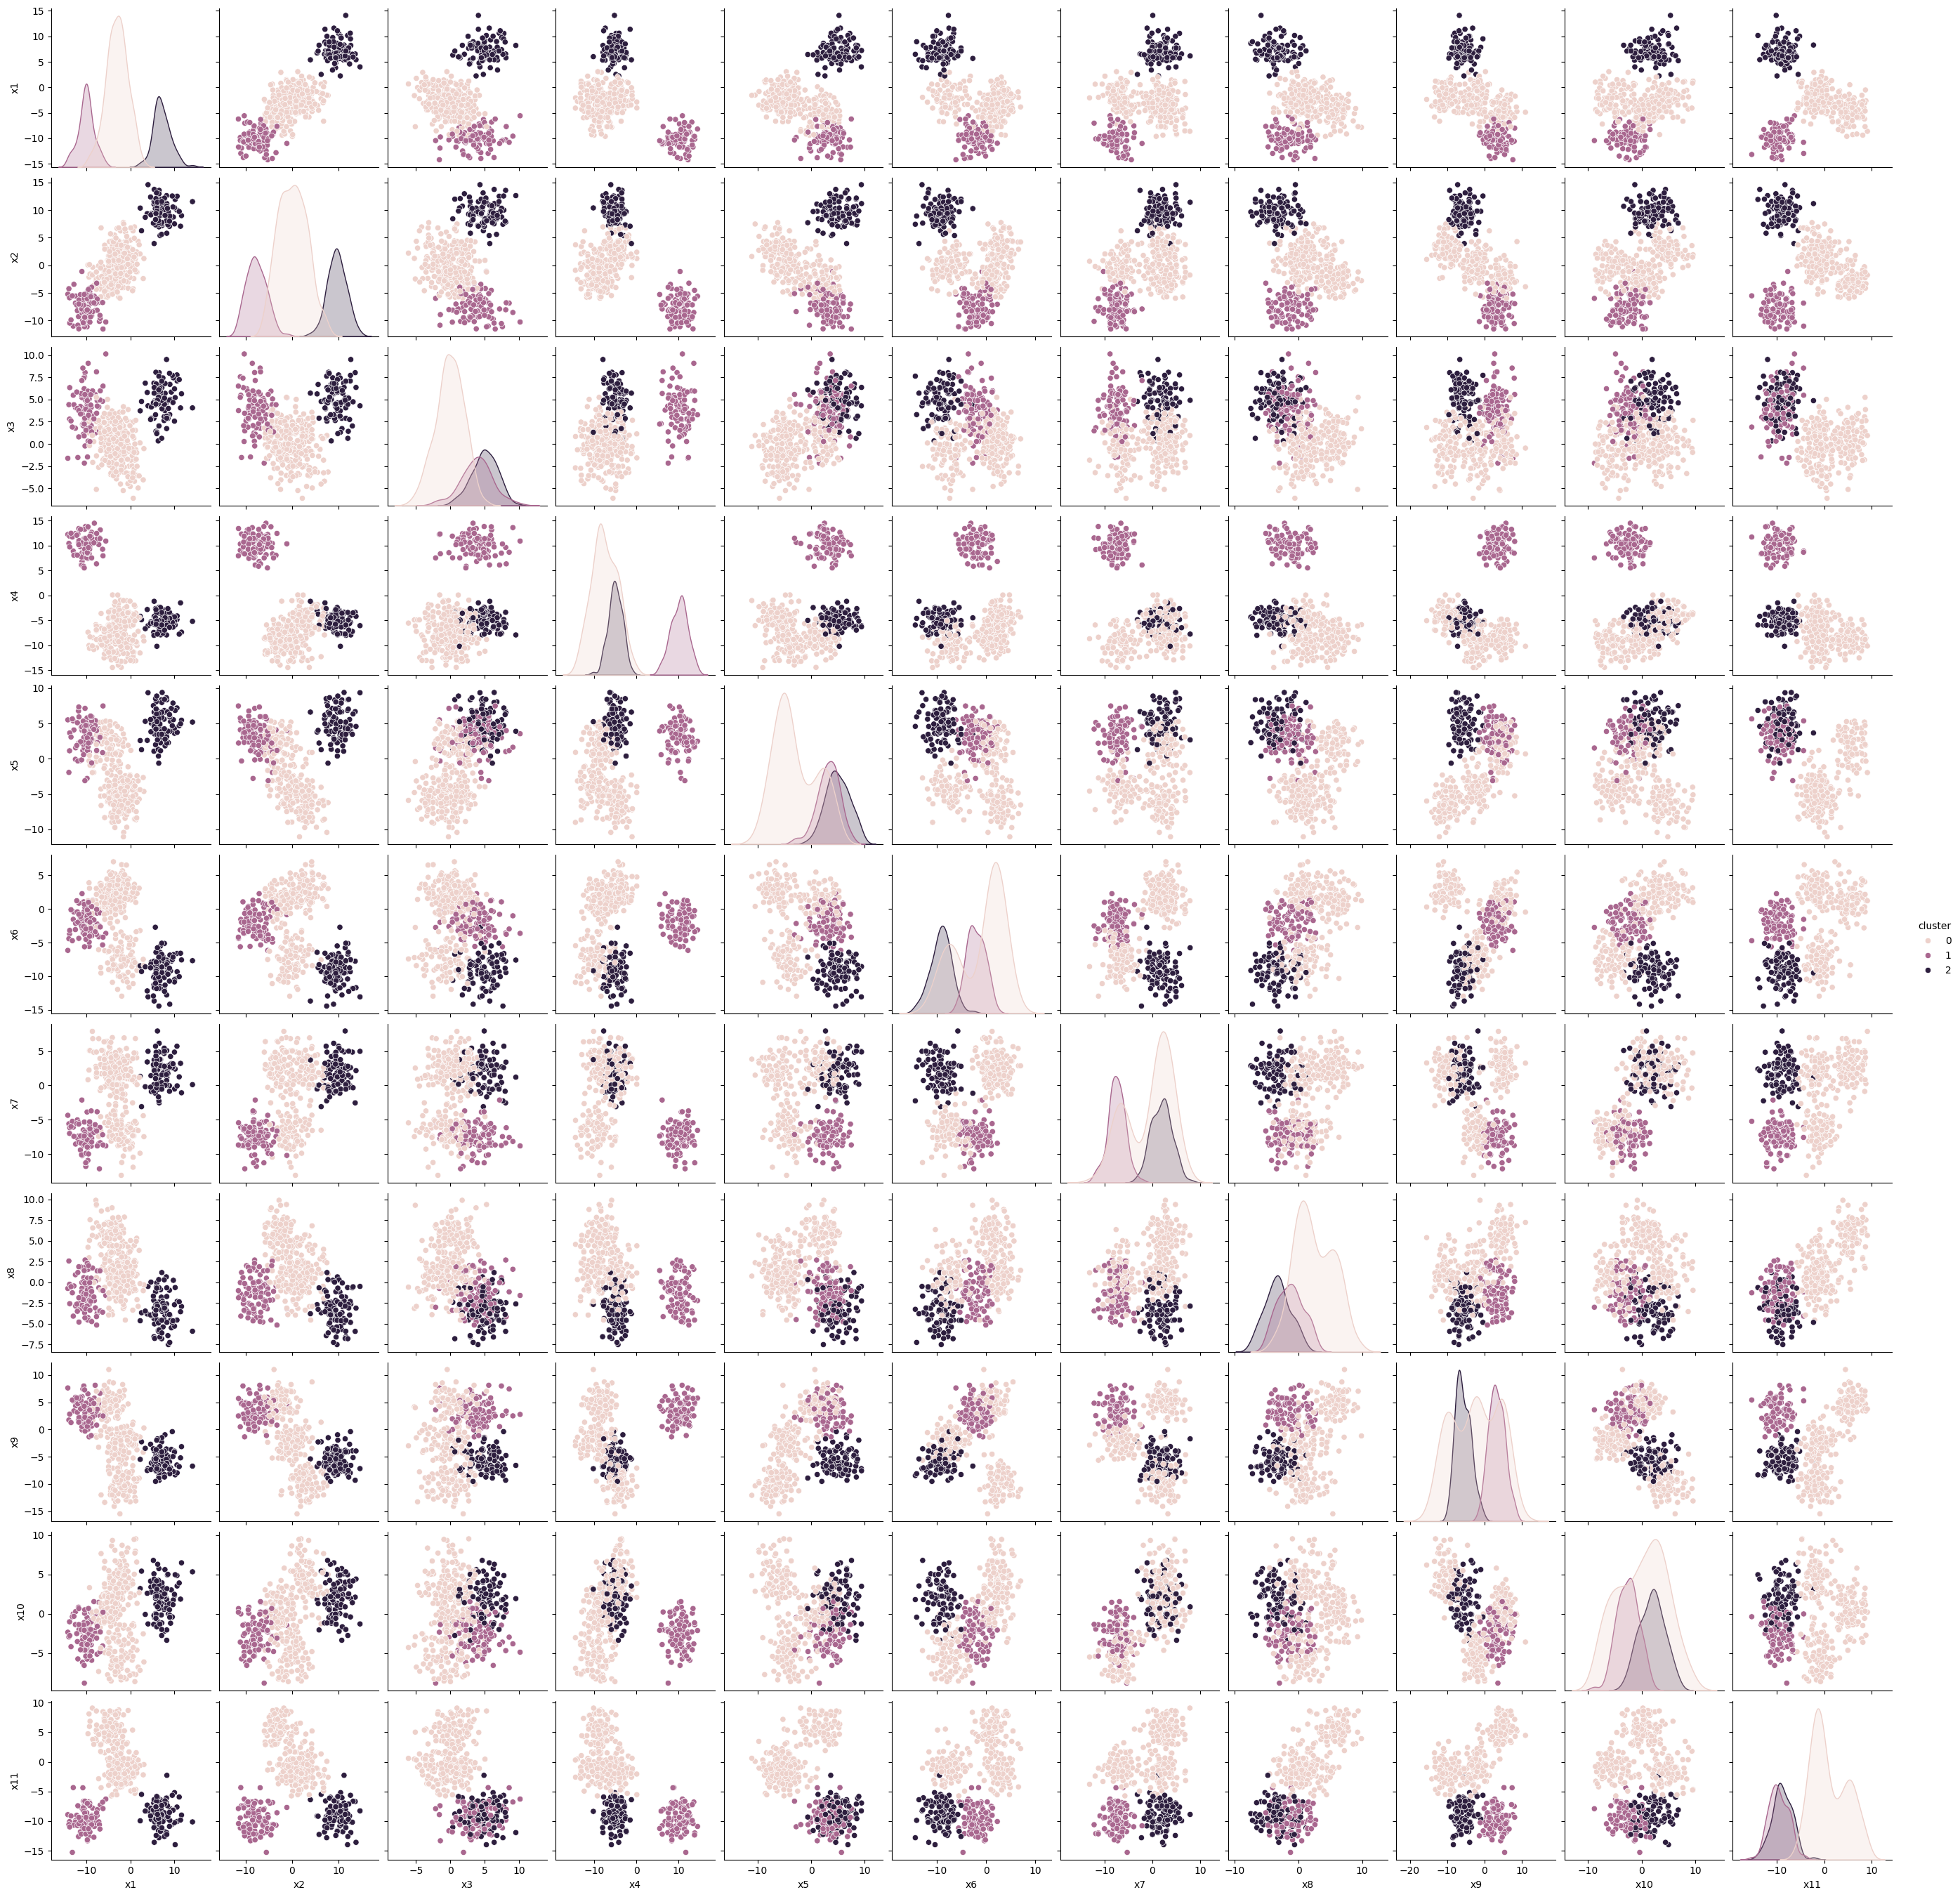

In [70]:
kmeans = KMeans(n_clusters=3, n_init="auto")

pairplot['cluster'] = kmeans.fit_predict(pairplot)

sns.pairplot(pairplot, diag_kind="kde", hue='cluster')
plt.show()

Add to your dataset a column with the estimated cluster to each data point

In [76]:
df.loc[pairplot.index, 'cluster'] = pairplot['cluster']
print(df.head())

   Unnamed: 0         x1        x2        x3         x4        x5        x6  \
0           0  -7.219738 -0.089923 -2.628920  -9.046805  0.090868 -6.052993   
1           1  -1.210557  2.130715  0.988166  -6.463544 -8.438858  2.905959   
2           2  -5.138359 -4.630616  0.772070 -11.225579  4.352903  3.591397   
3           3  -3.687856  0.517451  2.268282 -12.208089 -1.065503 -6.169523   
4           4  11.613590  8.997685  5.645866  -7.375333  5.464648 -7.579613   

         x7        x8        x9       x10       x11  cluster  
0 -7.437430  0.358208 -3.249854 -7.313930 -2.855678      0.0  
1  3.855969  0.595263 -9.585051  3.314742 -1.512923      0.0  
2  3.050483  8.790174  4.585363  1.512938  7.823646      0.0  
3 -1.173874  0.690940 -4.776490 -2.649515 -2.272127      0.0  
4 -1.069559 -2.900713 -3.142613  6.490809 -8.980515      2.0  


Print the number associated to each cluster

In [79]:
pairplot['cluster'].value_counts()

cluster
0    276
1     93
2     92
Name: count, dtype: int64

Print the centroids

In [80]:
print("Centroids:")
print(kmeans.cluster_centers_)

Centroids:
[[ -3.03888986   0.13014612  -0.10939801  -7.49811051  -2.90856529
   -1.18502421  -0.58932896   2.4936809   -2.36618644   0.03998757
    1.05660157   0.66666667]
 [-10.05674938  -7.64743659   3.81822907  10.14614016   3.1902691
   -2.05910313  -7.46363153  -1.28705749   3.2986529   -2.59536034
   -9.6096937    1.        ]
 [  7.15866047   9.63606585   4.94758269  -5.00469918   4.94927371
   -9.20794037   1.94208568  -3.30646936  -5.68616884   1.89282959
   -8.8796714    0.        ]]


Print the intertia metric

In [81]:
print("Inertia:", kmeans.inertia_)

Inertia: 56326.99730247857


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

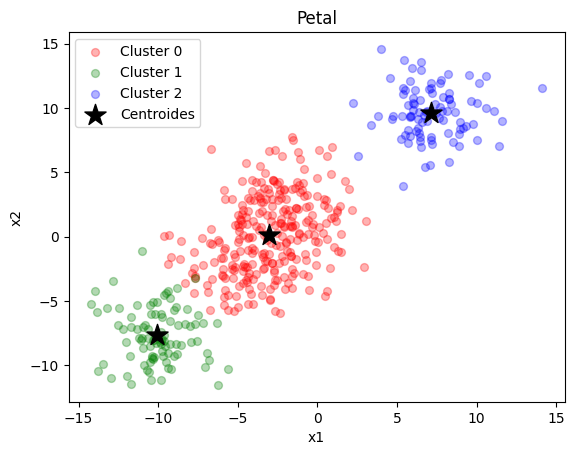

In [90]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: Aplicado kmeans con todas las variables entre si ya podemos observar la nueva columna con el número de a que grupo nuestro modelo piensa que pertenece cada medición

## d) Elbow plot

Compute the Elbow plot

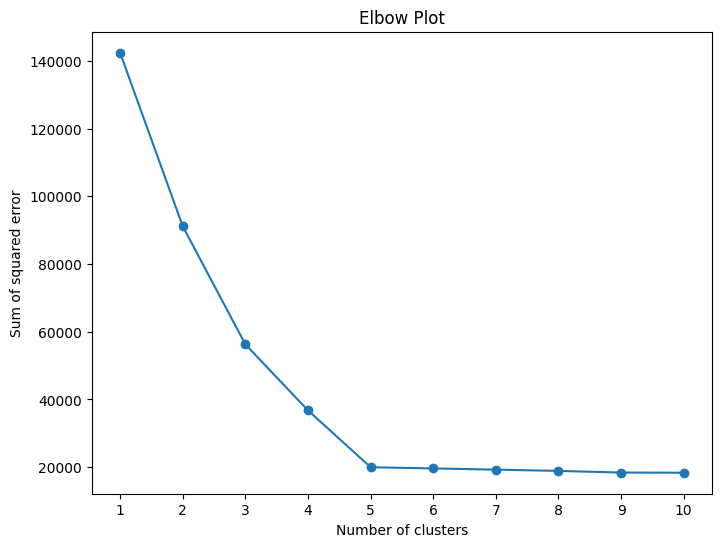

In [93]:
k_rng = range(1, 11)  # Trying from 1 to 10 clusters
sse = []

# Loop over the range of clusters, compute and store the inertia for each model
for k in k_rng:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit_predict(pairplot)  # pairplot is your DataFrame with numeric columns
    sse.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_rng, sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared error")
plt.title("Elbow Plot")
plt.xticks(k_rng)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: 5


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: no, inicialmente escogi 3 clusters debido a mi intuición al ver las gráficas, pero puede ver la razón de que 5 sea lo óptimo



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [201]:
data = load_digits()
digits = pd.DataFrame(data.data,
                  columns = data.feature_names)
display(digits)

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        5.0        0.0   
3           0.0        0.0        0.0        8.0  ...        9.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        4.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        1.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        2.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        8.0        0.0   

      pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0           0.0        0.0        6.0       13.0       10.0        0.0   
1           0.0        0.0        0.0       11.0       16.0       10.0   
2           0.0        0.0        0.0        3.0       11.0       16.0   
3           0.0        0.0        7.0       13.0       13.0        9.0   
4           0.0        0.0        0.0        2.0       16.0        4.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        2.0       14.0       15.0        9.0   
1793        0.0        0.0        6.0       16.0       14.0        6.0   
1794        0.0        0.0        2.0        9.0       13.0        6.0   
1795        0.0        0.0        5.0       12.0       16.0       12.0   
1796        0.0        1.0        8.0       12.0       14.0       12.0   

      pixel_7_6  pixel_7_7  
0           0.0        0.0  
1           0.0        0.0  
2           9.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1792        0.0        0.0  
1793        0.0        0.0  
1794        0.0        0.0  
1795        0.0        0.0  
1796        1.0        0.0  

[1797 rows x 64 columns]

2) Plot some of the observations (add in the title the label/digit of that obserbation)

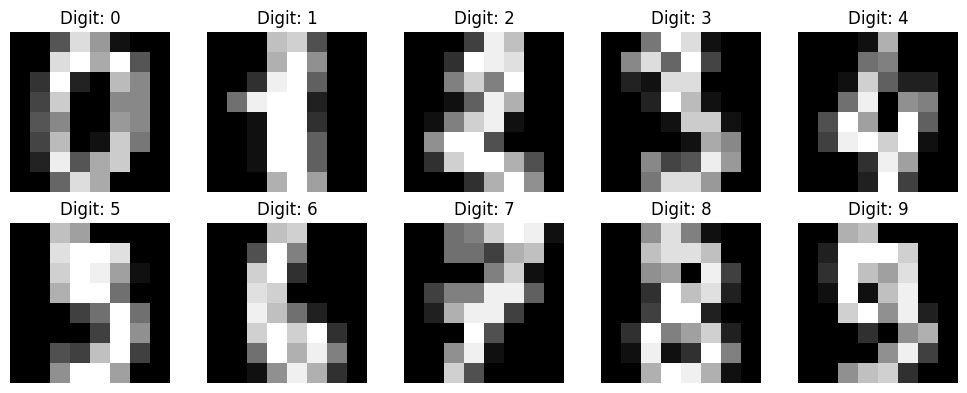

In [202]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = digits.iloc[i].values.reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {data.target[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [203]:
kmeans_all = KMeans(n_clusters=10, n_init="auto")
clusters = kmeans_all.fit_predict(digits)

digits['cluster'] = clusters

print(digits['cluster'].value_counts())

cluster
2    370
3    197
6    181
0    178
5    178
4    166
9    165
7    156
1    120
8     86
Name: count, dtype: int64


In [205]:
subset_first_row = digits[['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 
                             'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7']]

kmeans_1row = KMeans(n_clusters=10, n_init="auto")
clusters_first_row = kmeans_1row.fit_predict(subset_first_row)

digits['cluster_1row'] = clusters_first_row

In [206]:
subset_fourth_row = digits[['pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 
                            'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', ]]

kmeans_4row = KMeans(n_clusters=10, n_init="auto")
clusters_fourth_row = kmeans_4row.fit_predict(subset_fourth_row)

digits['cluster_4row'] = clusters_fourth_row

In [207]:
subset_eighth_row = digits[['pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 
                            'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', ]]

kmeans_8row = KMeans(n_clusters=10, n_init="auto")
clusters_eighth_row = kmeans_8row.fit_predict(subset_eighth_row)

digits['cluster_8row'] = clusters_eighth_row

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

In [211]:
digits

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_7_3  pixel_7_4  \
0           0.0        0.0        0.0        0.0  ...       13.0       10.0   
1           0.0        0.0        0.0        0.0  ...       11.0       16.0   
2           0.0        0.0        0.0        0.0  ...        3.0       11.0   
3           0.0        0.0        0.0        8.0  ...       13.0       13.0   
4           0.0        0.0        0.0        0.0  ...        2.0       16.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...       14.0       15.0   
1793        1.0        0.0        0.0        0.0  ...       16.0       14.0   
1794        0.0        0.0        0.0        0.0  ...        9.0       13.0   
1795        0.0        0.0        0.0        0.0  ...       12.0       16.0   
1796        0.0        0.0        0.0        2.0  ...       12.0       14.0   

      pixel_7_5  pixel_7_6  pixel_7_7  cluster  cluster_1row  cluster_4row  \
0           0.0        0.0        0.0        0             1             0   
1          10.0        0.0        0.0        1             7             1   
2          16.0        9.0        0.0        9             4             5   
3           9.0        0.0        0.0        2             3             2   
4           4.0        0.0        0.0        4             5             8   
...         ...        ...        ...      ...           ...           ...   
1792        9.0        0.0        0.0        2             7             3   
1793        6.0        0.0        0.0        0             0             0   
1794        6.0        0.0        0.0        9             7             9   
1795       12.0        0.0        0.0        2             1             8   
1796       12.0        1.0        0.0        9             9             9   

      cluster_8row  true_label  
0                8           0  
1                0           1  
2                9           2  
3                0           3  
4                3           4  
...            ...         ...  
1792             0           9  
1793             5           0  
1794             8           8  
1795             0           9  
1796             0           8  

[1797 rows x 69 columns]

In [ ]:
digits['true_label'] = data.target

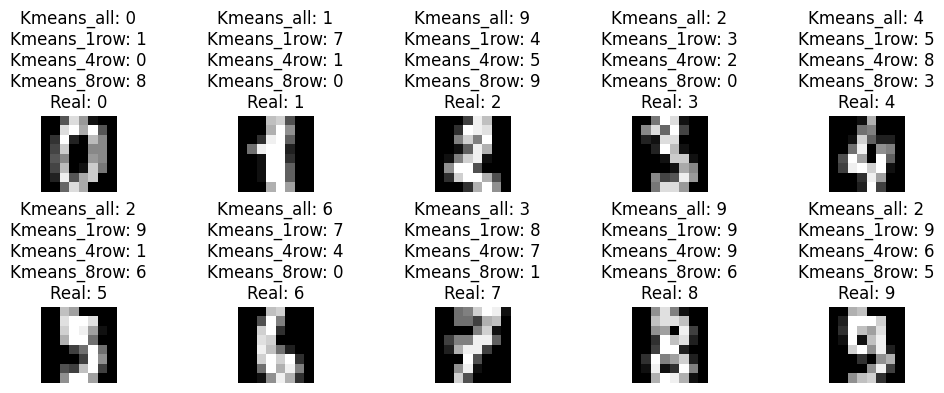

In [217]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = digits.iloc[i:i+1,0:64].values.reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.title(f"Kmeans_all: {digits.cluster[i]}\nKmeans_1row: {digits.cluster_1row[i]}\nKmeans_4row: {digits.cluster_4row[i]}\nKmeans_8row: {digits.cluster_8row[i]}\nReal: {digits.true_label[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

In [193]:
sse = []

k_rng = range(1,20)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(digits)
    sse.append(km.inertia_)

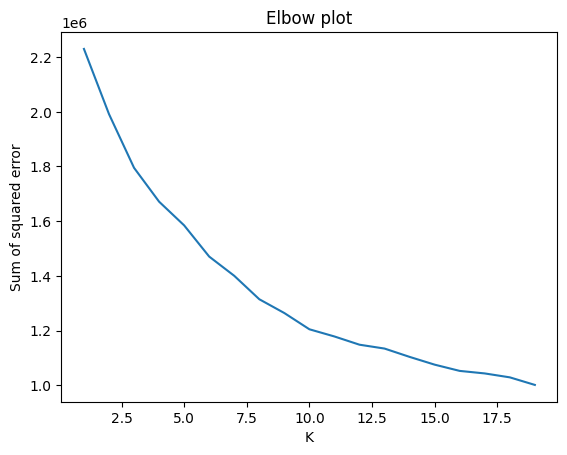

In [194]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): En teoría siempre debería de ser mejor con Kmeans all porque tiene todos los pixeles para predecir el dígito, aunque los resultados que obtuvimos no fueron los correctos en la mayoría de las veces, con entrenarlo más podría ser un mejor resultado

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [200]:
data = load_digits()
digits1 = pd.DataFrame(data.data,
                  columns = data.feature_names)
display(digits1)

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        5.0        0.0   
3           0.0        0.0        0.0        8.0  ...        9.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        4.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        1.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        2.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        8.0        0.0   

      pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0           0.0        0.0        6.0       13.0       10.0        0.0   
1           0.0        0.0        0.0       11.0       16.0       10.0   
2           0.0        0.0        0.0        3.0       11.0       16.0   
3           0.0        0.0        7.0       13.0       13.0        9.0   
4           0.0        0.0        0.0        2.0       16.0        4.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        2.0       14.0       15.0        9.0   
1793        0.0        0.0        6.0       16.0       14.0        6.0   
1794        0.0        0.0        2.0        9.0       13.0        6.0   
1795        0.0        0.0        5.0       12.0       16.0       12.0   
1796        0.0        1.0        8.0       12.0       14.0       12.0   

      pixel_7_6  pixel_7_7  
0           0.0        0.0  
1           0.0        0.0  
2           9.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1792        0.0        0.0  
1793        0.0        0.0  
1794        0.0        0.0  
1795        0.0        0.0  
1796        1.0        0.0  

[1797 rows x 64 columns]

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

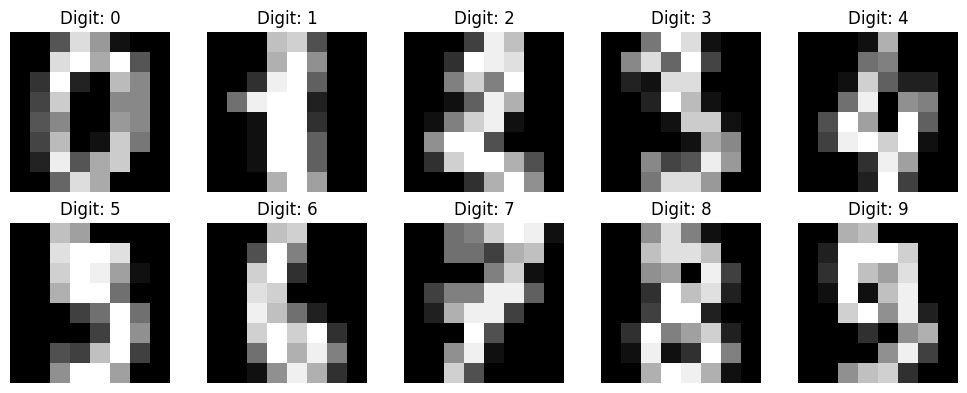

In [241]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = digits1.iloc[i].values.reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {data.target[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


3) Split the dataset in train and test

In [ ]:
X  = digits1.values
y  = digits["true_label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X1 = digits1[['pixel_0_0', 'pixel_1_0', 'pixel_2_0', 'pixel_3_0', 
                    'pixel_4_0', 'pixel_5_0', 'pixel_6_0', 'pixel_7_0']].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2)

X4 = digits1[['pixel_0_3', 'pixel_1_3', 'pixel_2_3', 'pixel_3_3', 
                    'pixel_4_3', 'pixel_5_3', 'pixel_6_3', 'pixel_7_3']].values

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2)

X8 = digits1[['pixel_0_7', 'pixel_1_7', 'pixel_2_7', 'pixel_3_7', 
                    'pixel_4_7', 'pixel_5_7', 'pixel_6_7', 'pixel_7_7']].values

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y, test_size=0.2)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [263]:
clf_all = LogisticRegression(C=1e20)
clf_all.fit(X_train, y_train)

clf_1col = LogisticRegression(C=1e20)
clf_1col.fit(X_train1, y_train1)

clf_4col = LogisticRegression(C=1e20)
clf_4col.fit(X_train4, y_train4)

clf_8col = LogisticRegression(C=1e20)
clf_8col.fit(X_train8, y_train8)

/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=1e+20)

5) Make predictions (use the test set)

In [264]:
y_pred = clf_all.predict(X_test)
print("Predictions for the test_all set:")
print(y_pred)

y_pred1 = clf_1col.predict(X_test1)
print("Predictions for the test_1col set:")
print(y_pred1)

y_pred4 = clf_4col.predict(X_test4)
print("Predictions for the test_4col set:")
print(y_pred4)

y_pred8 = clf_8col.predict(X_test8)
print("Predictions for the test_8col set:")
print(y_pred8)

Predictions for the test_all set:
[4 1 5 4 4 6 6 0 1 3 8 0 7 1 4 1 9 9 1 4 6 5 3 8 1 9 0 0 6 7 2 8 5 5 0 4 1
 7 3 0 4 1 4 9 3 2 2 2 3 5 2 3 6 1 5 1 2 2 5 7 1 6 3 1 1 9 8 7 1 3 4 9 0 2
 3 5 1 5 7 3 1 8 4 6 4 4 9 2 2 5 4 0 9 2 7 9 1 7 2 2 1 0 7 3 4 5 5 2 6 5 3
 3 0 8 9 0 1 8 5 3 0 2 1 0 6 6 5 9 0 7 9 2 7 7 9 8 9 2 1 0 6 7 0 8 8 1 6 6
 5 0 5 3 9 3 3 4 3 1 3 6 3 0 1 6 7 7 0 8 5 6 8 5 0 7 6 3 5 1 6 3 3 9 2 6 6
 7 9 0 5 5 1 5 1 4 4 8 1 7 7 3 7 1 2 8 4 0 5 3 2 3 8 1 3 4 4 7 2 2 2 6 3 2
 0 7 5 1 6 4 4 8 4 8 8 6 2 3 6 1 9 5 1 1 9 0 9 5 6 5 6 2 5 2 0 2 4 8 1 6 1
 5 6 2 8 9 6 5 1 4 8 0 0 4 8 8 0 7 9 3 5 4 8 0 8 2 4 3 6 0 6 6 4 4 4 7 7 7
 9 4 8 3 8 8 5 1 3 6 5 4 5 1 1 4 5 1 9 2 7 3 3 5 8 4 8 0 1 3 6 1 8 5 0 2 0
 9 5 6 7 3 9 3 0 4 7 5 3 2 5 6 2 1 5 6 9 9 8 4 4 0 5 7]
Predictions for the test_1col set:
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

6) Compute performance metrics

Total Accuracy fol ALL: 96.67


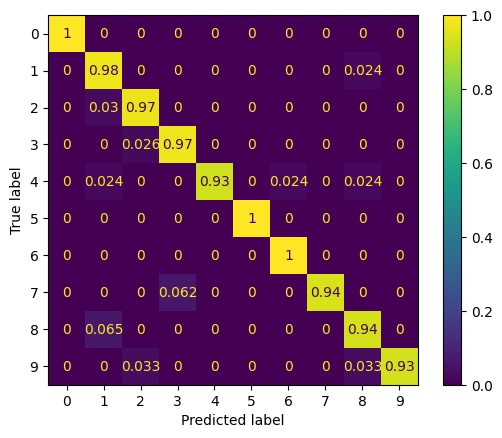

Total Accuracy fol 1COL: 9.72


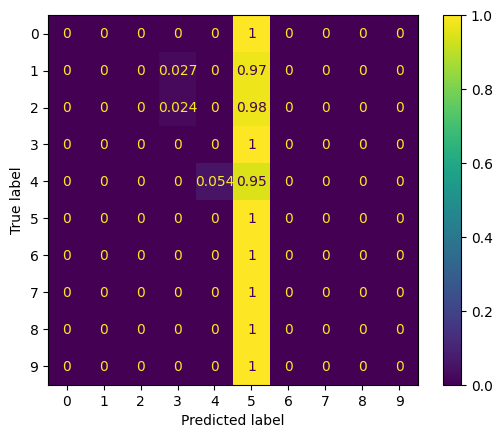

Total Accuracy fol 4COL: 54.44


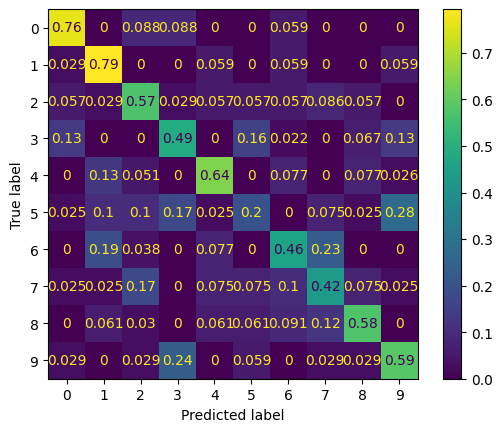

Total Accuracy fol 8COL: 16.94


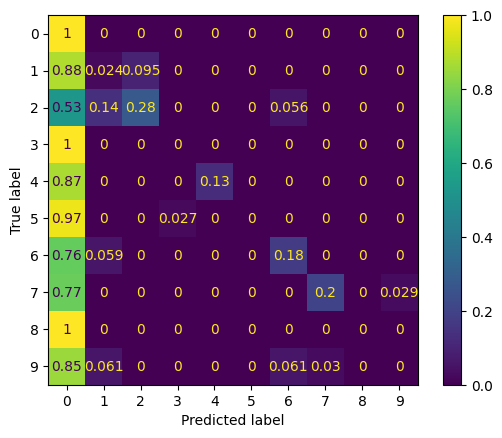

In [266]:
accuracy = 100*accuracy_score(y_test, y_pred)
print(f"Total Accuracy fol ALL: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred,normalize= "true")
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_all.classes_)
disp.plot()
plt.show()

accuracy1 = 100*accuracy_score(y_test1, y_pred1)
print(f"Total Accuracy fol 1COL: {accuracy1:.2f}")

cm1 = confusion_matrix(y_test1, y_pred1,normalize= "true")
cm1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf_1col.classes_)
disp1.plot()
plt.show()

accuracy4 = 100*accuracy_score(y_test4, y_pred4)
print(f"Total Accuracy fol 4COL: {accuracy4:.2f}")

cm4 = confusion_matrix(y_test4, y_pred4, normalize= "true")
cm4
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=clf_4col.classes_)
disp4.plot()
plt.show()

accuracy8 = 100*accuracy_score(y_test8, y_pred8)
print(f"Total Accuracy fol 8COL: {accuracy8:.2f}")

cm8 = confusion_matrix(y_test8, y_pred8, normalize= "true")
cm8
disp8 = ConfusionMatrixDisplay(confusion_matrix=cm8, display_labels=clf_8col.classes_)
disp8.plot()
plt.show()

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

In [267]:
df = pd.DataFrame(X_test)

df1 = pd.DataFrame(X_test1)

df4 = pd.DataFrame(X_test4)

df8 = pd.DataFrame(X_test8)

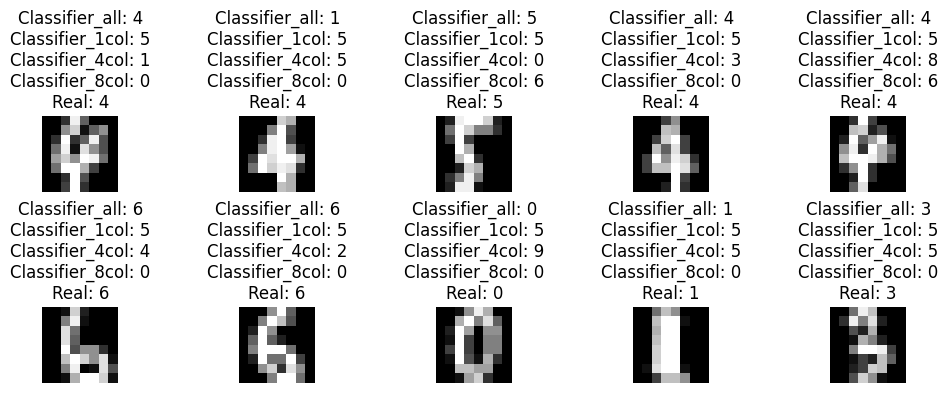

In [273]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = df.iloc[i:i+1,0:64].values.reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.title(f"Classifier_all: {y_pred[i]}\nClassifier_1col: {y_pred1[i]}\nClassifier_4col: {y_pred4[i]}\nClassifier_8col: {y_pred8[i]}\nReal: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response): Aqui como el modelo ya fue entrenado previamente a sus predicciones podemos ver que en el clasificador que usamos todos los pixeles tuvo un acierto casi perfecto, mientras que mientras usabamos menos columnas la exactitud disminuía por mucho.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Pude interpretar interacciones entre variables de un problema gracias a las actividades guiadas de la semana tec.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Soy capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.